In [1]:
from pandas import read_csv, DataFrame, Series
import pandas as pd
import statsmodels.api as sm
#import rpy2.robjects as R
#from rpy2.robjects.packages import importr
from pandas import date_range
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import numpy as np
#import ml_metrics as metrics
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = read_csv('J2TX.ALLFUTGOLD_200728_230728.csv',',')

D:\Programs\Anac\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,28/07/20,02:00,1937.1,1944.8,1935.4,1943.3,7594
1,28/07/20,03:00,1943.3,1961.8,1942.8,1959.3,16733
2,28/07/20,04:00,1959.1,1961.8,1954.6,1958.0,10094
3,28/07/20,05:00,1958.1,1974.7,1956.6,1965.3,23017
4,28/07/20,06:00,1965.3,1970.4,1958.1,1959.0,11546
...,...,...,...,...,...,...,...
17799,28/07/23,20:00,1999.3,2002.0,1998.7,1999.7,6701
17800,28/07/23,21:00,1999.6,2001.0,1997.4,1998.2,6542
17801,28/07/23,22:00,1998.3,1999.5,1997.6,1997.6,2737
17802,28/07/23,23:00,1997.6,1998.2,1996.0,1997.7,2633


In [4]:
df["<DATE>"] = df["<DATE>"].apply(str)+ " " + df['<TIME>'].apply(str)

In [5]:
df

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,28/07/20 02:00,02:00,1937.1,1944.8,1935.4,1943.3,7594
1,28/07/20 03:00,03:00,1943.3,1961.8,1942.8,1959.3,16733
2,28/07/20 04:00,04:00,1959.1,1961.8,1954.6,1958.0,10094
3,28/07/20 05:00,05:00,1958.1,1974.7,1956.6,1965.3,23017
4,28/07/20 06:00,06:00,1965.3,1970.4,1958.1,1959.0,11546
...,...,...,...,...,...,...,...
17799,28/07/23 20:00,20:00,1999.3,2002.0,1998.7,1999.7,6701
17800,28/07/23 21:00,21:00,1999.6,2001.0,1997.4,1998.2,6542
17801,28/07/23 22:00,22:00,1998.3,1999.5,1997.6,1997.6,2737
17802,28/07/23 23:00,23:00,1997.6,1998.2,1996.0,1997.7,2633


In [6]:
from datetime import datetime

In [7]:
df["<DATE>"] = df["<DATE>"].apply(lambda x: datetime.strptime(x, '%d/%m/%y %H:%M'))

In [8]:
df.index=df['<DATE>']
df

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
<DATE>,,,,,,,
2020-07-28 02:00:00,2020-07-28 02:00:00,02:00,1937.1,1944.8,1935.4,1943.3,7594
2020-07-28 03:00:00,2020-07-28 03:00:00,03:00,1943.3,1961.8,1942.8,1959.3,16733
2020-07-28 04:00:00,2020-07-28 04:00:00,04:00,1959.1,1961.8,1954.6,1958.0,10094
2020-07-28 05:00:00,2020-07-28 05:00:00,05:00,1958.1,1974.7,1956.6,1965.3,23017
2020-07-28 06:00:00,2020-07-28 06:00:00,06:00,1965.3,1970.4,1958.1,1959.0,11546
...,...,...,...,...,...,...,...
2023-07-28 20:00:00,2023-07-28 20:00:00,20:00,1999.3,2002.0,1998.7,1999.7,6701
2023-07-28 21:00:00,2023-07-28 21:00:00,21:00,1999.6,2001.0,1997.4,1998.2,6542
2023-07-28 22:00:00,2023-07-28 22:00:00,22:00,1998.3,1999.5,1997.6,1997.6,2737


In [9]:
ts = df['<OPEN>']
ts.head(40)

<DATE>
2020-07-28 02:00:00    1937.1
2020-07-28 03:00:00    1943.3
2020-07-28 04:00:00    1959.1
2020-07-28 05:00:00    1958.1
2020-07-28 06:00:00    1965.3
2020-07-28 07:00:00    1959.0
2020-07-28 08:00:00    1935.8
2020-07-28 09:00:00    1936.3
2020-07-28 10:00:00    1932.9
2020-07-28 11:00:00    1932.7
2020-07-28 12:00:00    1906.9
2020-07-28 13:00:00    1925.8
2020-07-28 14:00:00    1924.5
2020-07-28 15:00:00    1922.6
2020-07-28 16:00:00    1922.9
2020-07-28 17:00:00    1934.1
2020-07-28 18:00:00    1930.2
2020-07-28 19:00:00    1950.3
2020-07-28 20:00:00    1947.8
2020-07-28 21:00:00    1942.4
2020-07-28 22:00:00    1949.6
2020-07-28 23:00:00    1950.1
2020-07-29 00:00:00    1950.0
2020-07-29 02:00:00    1950.6
2020-07-29 03:00:00    1944.0
2020-07-29 04:00:00    1949.7
2020-07-29 05:00:00    1952.2
2020-07-29 06:00:00    1953.4
2020-07-29 07:00:00    1948.8
2020-07-29 08:00:00    1950.7
2020-07-29 09:00:00    1947.3
2020-07-29 10:00:00    1948.4
2020-07-29 11:00:00    1955.0
202

In [10]:
import datetime as dt
tsold = ts

In [11]:
datelist = pd.date_range(start='28/07/2020 02:00:00', end='29/07/2023', freq='H').to_series()
datelist.index = datelist
datelist.head(15)

2020-07-28 02:00:00   2020-07-28 02:00:00
2020-07-28 03:00:00   2020-07-28 03:00:00
2020-07-28 04:00:00   2020-07-28 04:00:00
2020-07-28 05:00:00   2020-07-28 05:00:00
2020-07-28 06:00:00   2020-07-28 06:00:00
2020-07-28 07:00:00   2020-07-28 07:00:00
2020-07-28 08:00:00   2020-07-28 08:00:00
2020-07-28 09:00:00   2020-07-28 09:00:00
2020-07-28 10:00:00   2020-07-28 10:00:00
2020-07-28 11:00:00   2020-07-28 11:00:00
2020-07-28 12:00:00   2020-07-28 12:00:00
2020-07-28 13:00:00   2020-07-28 13:00:00
2020-07-28 14:00:00   2020-07-28 14:00:00
2020-07-28 15:00:00   2020-07-28 15:00:00
2020-07-28 16:00:00   2020-07-28 16:00:00
dtype: datetime64[ns]

In [12]:
from scipy.optimize import curve_fit
def mapping1(values_x, a, b, c): 
    return a * values_x**2 + b * values_x + c 

In [13]:
diff = dt.timedelta(1/24)
diff

datetime.timedelta(seconds=3600)

In [14]:
for key in datelist.index:
    if key in ts.index:
        datelist[key] = ts[key]
    else:
        print(key)
        #print(key-diff)
        #print(key-6*diff)
        #args, covar = curve_fit(mapping1, np.array([1,2,3,4,5]), np.array(pd.date_range(start=key-5*diff, end=key-diff, freq='H').to_series().apply(lambda x: datelist[x]).tolist()))
        args, covar = curve_fit(mapping1, np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]), np.array(pd.date_range(start=key-20*diff, end=key-diff, freq='H').to_series().apply(lambda x: datelist[x]).tolist()))
        y = mapping1(6, args[0], args[1], args[2])
        print(round(y,1))
        datelist[key] = round(y,1)
datelist

2020-07-29 01:00:00
1933.9
2020-07-30 01:00:00
1951.1
2020-07-31 01:00:00
1951.8
2020-08-01 01:00:00
1989.9
2020-08-01 02:00:00
1991.1
2020-08-01 03:00:00
1991.7
2020-08-01 04:00:00
1992.0
2020-08-01 05:00:00
1992.0
2020-08-01 06:00:00
1992.2
2020-08-01 07:00:00
1991.9
2020-08-01 08:00:00
1991.3
2020-08-01 09:00:00
1990.8
2020-08-01 10:00:00
1990.4
2020-08-01 11:00:00
1990.3
2020-08-01 12:00:00
1990.2
2020-08-01 13:00:00
1990.2
2020-08-01 14:00:00
1990.3
2020-08-01 15:00:00
1990.8
2020-08-01 16:00:00
1990.9
2020-08-01 17:00:00
1990.9
2020-08-01 18:00:00
1991.0
2020-08-01 19:00:00
1991.2
2020-08-01 20:00:00
1991.2
2020-08-01 21:00:00
1991.1
2020-08-01 22:00:00
1991.2
2020-08-01 23:00:00
1991.1
2020-08-02 00:00:00
1991.0
2020-08-02 01:00:00
1990.9
2020-08-02 02:00:00
1990.8
2020-08-02 03:00:00
1990.8
2020-08-02 04:00:00
1990.7
2020-08-02 05:00:00
1990.7
2020-08-02 06:00:00
1990.7
2020-08-02 07:00:00
1990.8
2020-08-02 08:00:00
1990.9
2020-08-02 09:00:00
1990.9
2020-08-02 10:00:00
1991.0
2

1952.1
2020-09-12 17:00:00
1951.8
2020-09-12 18:00:00
1952.1
2020-09-12 19:00:00
1952.6
2020-09-12 20:00:00
1952.9
2020-09-12 21:00:00
1953.0
2020-09-12 22:00:00
1953.0
2020-09-12 23:00:00
1953.0
2020-09-13 00:00:00
1953.0
2020-09-13 01:00:00
1953.0
2020-09-13 02:00:00
1953.0
2020-09-13 03:00:00
1952.9
2020-09-13 04:00:00
1952.8
2020-09-13 05:00:00
1952.8
2020-09-13 06:00:00
1952.7
2020-09-13 07:00:00
1952.7
2020-09-13 08:00:00
1952.7
2020-09-13 09:00:00
1952.7
2020-09-13 10:00:00
1952.7
2020-09-13 11:00:00
1952.7
2020-09-13 12:00:00
1952.7
2020-09-13 13:00:00
1952.8
2020-09-13 14:00:00
1952.8
2020-09-13 15:00:00
1952.9
2020-09-13 16:00:00
1952.9
2020-09-13 17:00:00
1952.9
2020-09-13 18:00:00
1952.8
2020-09-13 19:00:00
1952.8
2020-09-13 20:00:00
1952.8
2020-09-13 21:00:00
1952.8
2020-09-13 22:00:00
1952.8
2020-09-13 23:00:00
1952.8
2020-09-14 00:00:00
1952.8
2020-09-14 01:00:00
1952.8
2020-09-15 01:00:00
1954.4
2020-09-16 01:00:00
1974.3
2020-09-17 01:00:00
1970.3
2020-09-18 01:00:00
1

1878.5
2020-11-01 06:00:00
1878.4
2020-11-01 07:00:00
1878.3
2020-11-01 08:00:00
1878.2
2020-11-01 09:00:00
1878.1
2020-11-01 10:00:00
1878.0
2020-11-01 11:00:00
1878.0
2020-11-01 12:00:00
1878.1
2020-11-01 13:00:00
1878.2
2020-11-01 14:00:00
1878.2
2020-11-01 15:00:00
1878.3
2020-11-01 16:00:00
1878.3
2020-11-01 17:00:00
1878.4
2020-11-01 18:00:00
1878.4
2020-11-01 19:00:00
1878.4
2020-11-01 20:00:00
1878.4
2020-11-01 21:00:00
1878.3
2020-11-01 22:00:00
1878.3
2020-11-01 23:00:00
1878.3
2020-11-02 00:00:00
1878.2
2020-11-02 01:00:00
1878.2
2020-11-02 02:00:00
1878.2
2020-11-03 02:00:00
1884.7
2020-11-04 02:00:00
1896.0
2020-11-05 02:00:00
1897.2
2020-11-06 02:00:00
1913.0
2020-11-07 02:00:00
1945.6
2020-11-07 03:00:00
1946.6
2020-11-07 04:00:00
1947.6
2020-11-07 05:00:00
1948.8
2020-11-07 06:00:00
1949.9
2020-11-07 07:00:00
1950.7
2020-11-07 08:00:00
1951.2
2020-11-07 09:00:00
1951.2
2020-11-07 10:00:00
1951.4
2020-11-07 11:00:00
1951.3
2020-11-07 12:00:00
1951.1
2020-11-07 13:00:00
1

2020-12-15 02:00:00
1835.3
2020-12-16 02:00:00
1843.4
2020-12-17 02:00:00
1860.7
2020-12-18 02:00:00
1877.6
2020-12-19 02:00:00
1887.3
2020-12-19 03:00:00
1887.6
2020-12-19 04:00:00
1887.8
2020-12-19 05:00:00
1887.9
2020-12-19 06:00:00
1887.8
2020-12-19 07:00:00
1887.9
2020-12-19 08:00:00
1888.0
2020-12-19 09:00:00
1888.1
2020-12-19 10:00:00
1888.3
2020-12-19 11:00:00
1888.5
2020-12-19 12:00:00
1888.7
2020-12-19 13:00:00
1888.5
2020-12-19 14:00:00
1888.2
2020-12-19 15:00:00
1888.0
2020-12-19 16:00:00
1888.0
2020-12-19 17:00:00
1887.7
2020-12-19 18:00:00
1887.7
2020-12-19 19:00:00
1887.6
2020-12-19 20:00:00
1887.7
2020-12-19 21:00:00
1888.0
2020-12-19 22:00:00
1888.0
2020-12-19 23:00:00
1888.1
2020-12-20 00:00:00
1888.1
2020-12-20 01:00:00
1888.1
2020-12-20 02:00:00
1888.1
2020-12-20 03:00:00
1888.1
2020-12-20 04:00:00
1888.1
2020-12-20 05:00:00
1888.1
2020-12-20 06:00:00
1888.1
2020-12-20 07:00:00
1888.0
2020-12-20 08:00:00
1888.0
2020-12-20 09:00:00
1888.0
2020-12-20 10:00:00
1887.9
2

D:\Programs\Anac\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


1880.4
2020-12-27 20:00:00
1880.4
2020-12-27 21:00:00
1880.4
2020-12-27 22:00:00
1880.4
2020-12-27 23:00:00
1880.4
2020-12-28 00:00:00
1880.4
2020-12-28 01:00:00
1880.4
2020-12-28 02:00:00
1880.4
2020-12-29 02:00:00
1892.8
2020-12-30 02:00:00
1882.5
2020-12-31 02:00:00
1884.4
2021-01-01 02:00:00
1896.0
2021-01-01 03:00:00
1896.3
2021-01-01 04:00:00
1896.8
2021-01-01 05:00:00
1897.5
2021-01-01 06:00:00
1898.0
2021-01-01 07:00:00
1898.4
2021-01-01 08:00:00
1898.9
2021-01-01 09:00:00
1899.0
2021-01-01 10:00:00
1899.0
2021-01-01 11:00:00
1898.9
2021-01-01 12:00:00
1899.0
2021-01-01 13:00:00
1899.0
2021-01-01 14:00:00
1899.0
2021-01-01 15:00:00
1898.7
2021-01-01 16:00:00
1898.8
2021-01-01 17:00:00
1898.4
2021-01-01 18:00:00
1898.4
2021-01-01 19:00:00
1898.4
2021-01-01 20:00:00
1898.6
2021-01-01 21:00:00
1898.4
2021-01-01 22:00:00
1898.1
2021-01-01 23:00:00
1898.4
2021-01-02 00:00:00
1898.6
2021-01-02 01:00:00
1898.7
2021-01-02 02:00:00
1898.8
2021-01-02 03:00:00
1898.8
2021-01-02 04:00:00
1

1819.9
2021-02-13 10:00:00
1820.2
2021-02-13 11:00:00
1820.3
2021-02-13 12:00:00
1820.3
2021-02-13 13:00:00
1820.4
2021-02-13 14:00:00
1820.5
2021-02-13 15:00:00
1820.8
2021-02-13 16:00:00
1821.1
2021-02-13 17:00:00
1820.4
2021-02-13 18:00:00
1820.0
2021-02-13 19:00:00
1820.1
2021-02-13 20:00:00
1819.9
2021-02-13 21:00:00
1820.0
2021-02-13 22:00:00
1819.9
2021-02-13 23:00:00
1820.0
2021-02-14 00:00:00
1820.1
2021-02-14 01:00:00
1820.1
2021-02-14 02:00:00
1820.2
2021-02-14 03:00:00
1820.2
2021-02-14 04:00:00
1820.3
2021-02-14 05:00:00
1820.3
2021-02-14 06:00:00
1820.3
2021-02-14 07:00:00
1820.3
2021-02-14 08:00:00
1820.3
2021-02-14 09:00:00
1820.3
2021-02-14 10:00:00
1820.2
2021-02-14 11:00:00
1820.2
2021-02-14 12:00:00
1820.2
2021-02-14 13:00:00
1820.1
2021-02-14 14:00:00
1820.1
2021-02-14 15:00:00
1820.1
2021-02-14 16:00:00
1820.2
2021-02-14 17:00:00
1820.2
2021-02-14 18:00:00
1820.2
2021-02-14 19:00:00
1820.2
2021-02-14 20:00:00
1820.2
2021-02-14 21:00:00
1820.2
2021-02-14 22:00:00
1

1727.6
2021-03-27 18:00:00
1727.4
2021-03-27 19:00:00
1727.2
2021-03-27 20:00:00
1727.1
2021-03-27 21:00:00
1727.0
2021-03-27 22:00:00
1727.2
2021-03-27 23:00:00
1727.5
2021-03-28 00:00:00
1727.6
2021-03-28 01:00:00
1727.7
2021-03-28 02:00:00
1727.7
2021-03-28 03:00:00
1727.7
2021-03-28 04:00:00
1727.7
2021-03-28 05:00:00
1727.7
2021-03-28 06:00:00
1727.7
2021-03-28 07:00:00
1727.7
2021-03-28 08:00:00
1727.7
2021-03-28 09:00:00
1727.6
2021-03-28 10:00:00
1727.6
2021-03-28 11:00:00
1727.5
2021-03-28 12:00:00
1727.5
2021-03-28 13:00:00
1727.5
2021-03-28 14:00:00
1727.5
2021-03-28 15:00:00
1727.5
2021-03-28 16:00:00
1727.5
2021-03-28 17:00:00
1727.6
2021-03-28 18:00:00
1727.6
2021-03-28 19:00:00
1727.6
2021-03-28 20:00:00
1727.6
2021-03-28 21:00:00
1727.6
2021-03-28 22:00:00
1727.6
2021-03-28 23:00:00
1727.6
2021-03-29 00:00:00
1727.6
2021-03-29 01:00:00
1727.6
2021-03-30 01:00:00
1726.3
2021-03-31 01:00:00
1700.1
2021-04-01 01:00:00
1682.2
2021-04-02 01:00:00
1714.1
2021-04-02 02:00:00
1

1828.4
2021-05-09 17:00:00
1828.5
2021-05-09 18:00:00
1828.6
2021-05-09 19:00:00
1828.6
2021-05-09 20:00:00
1828.5
2021-05-09 21:00:00
1828.5
2021-05-09 22:00:00
1828.5
2021-05-09 23:00:00
1828.4
2021-05-10 00:00:00
1828.4
2021-05-10 01:00:00
1828.3
2021-05-11 01:00:00
1836.4
2021-05-12 01:00:00
1835.7
2021-05-14 01:00:00
1816.5
2021-05-15 01:00:00
1828.9
2021-05-15 02:00:00
1830.7
2021-05-15 03:00:00
1832.4
2021-05-15 04:00:00
1834.0
2021-05-15 05:00:00
1835.3
2021-05-15 06:00:00
1836.4
2021-05-15 07:00:00
1837.0
2021-05-15 08:00:00
1837.0
2021-05-15 09:00:00
1837.2
2021-05-15 10:00:00
1837.1
2021-05-15 11:00:00
1837.2
2021-05-15 12:00:00
1837.2
2021-05-15 13:00:00
1837.2
2021-05-15 14:00:00
1837.0
2021-05-15 15:00:00
1836.7
2021-05-15 16:00:00
1836.5
2021-05-15 17:00:00
1836.3
2021-05-15 18:00:00
1836.1
2021-05-15 19:00:00
1835.9
2021-05-15 20:00:00
1835.6
2021-05-15 21:00:00
1835.2
2021-05-15 22:00:00
1835.9
2021-05-15 23:00:00
1836.4
2021-05-16 00:00:00
1836.7
2021-05-16 01:00:00
1

1781.3
2021-06-26 03:00:00
1781.5
2021-06-26 04:00:00
1781.7
2021-06-26 05:00:00
1781.9
2021-06-26 06:00:00
1782.2
2021-06-26 07:00:00
1782.1
2021-06-26 08:00:00
1782.1
2021-06-26 09:00:00
1781.9
2021-06-26 10:00:00
1781.7
2021-06-26 11:00:00
1781.5
2021-06-26 12:00:00
1781.3
2021-06-26 13:00:00
1781.0
2021-06-26 14:00:00
1780.7
2021-06-26 15:00:00
1780.3
2021-06-26 16:00:00
1780.4
2021-06-26 17:00:00
1780.6
2021-06-26 18:00:00
1781.0
2021-06-26 19:00:00
1781.3
2021-06-26 20:00:00
1781.5
2021-06-26 21:00:00
1781.6
2021-06-26 22:00:00
1781.6
2021-06-26 23:00:00
1781.5
2021-06-27 00:00:00
1781.5
2021-06-27 01:00:00
1781.4
2021-06-27 02:00:00
1781.3
2021-06-27 03:00:00
1781.2
2021-06-27 04:00:00
1781.2
2021-06-27 05:00:00
1781.1
2021-06-27 06:00:00
1781.1
2021-06-27 07:00:00
1781.1
2021-06-27 08:00:00
1781.1
2021-06-27 09:00:00
1781.1
2021-06-27 10:00:00
1781.1
2021-06-27 11:00:00
1781.2
2021-06-27 12:00:00
1781.3
2021-06-27 13:00:00
1781.3
2021-06-27 14:00:00
1781.3
2021-06-27 15:00:00
1

1768.6
2021-08-14 10:00:00
1769.3
2021-08-14 11:00:00
1769.7
2021-08-14 12:00:00
1770.0
2021-08-14 13:00:00
1770.2
2021-08-14 14:00:00
1770.2
2021-08-14 15:00:00
1770.0
2021-08-14 16:00:00
1769.2
2021-08-14 17:00:00
1768.3
2021-08-14 18:00:00
1767.6
2021-08-14 19:00:00
1766.8
2021-08-14 20:00:00
1766.3
2021-08-14 21:00:00
1765.8
2021-08-14 22:00:00
1766.9
2021-08-14 23:00:00
1767.7
2021-08-15 00:00:00
1768.2
2021-08-15 01:00:00
1768.5
2021-08-15 02:00:00
1768.7
2021-08-15 03:00:00
1768.8
2021-08-15 04:00:00
1768.8
2021-08-15 05:00:00
1768.7
2021-08-15 06:00:00
1768.6
2021-08-15 07:00:00
1768.4
2021-08-15 08:00:00
1768.3
2021-08-15 09:00:00
1768.1
2021-08-15 10:00:00
1768.0
2021-08-15 11:00:00
1767.8
2021-08-15 12:00:00
1767.8
2021-08-15 13:00:00
1767.7
2021-08-15 14:00:00
1767.8
2021-08-15 15:00:00
1767.9
2021-08-15 16:00:00
1768.0
2021-08-15 17:00:00
1768.2
2021-08-15 18:00:00
1768.3
2021-08-15 19:00:00
1768.4
2021-08-15 20:00:00
1768.4
2021-08-15 21:00:00
1768.3
2021-08-15 22:00:00
1

1757.1
2021-10-03 12:00:00
1757.1
2021-10-03 13:00:00
1757.1
2021-10-03 14:00:00
1757.1
2021-10-03 15:00:00
1757.2
2021-10-03 16:00:00
1757.2
2021-10-03 17:00:00
1757.2
2021-10-03 18:00:00
1757.3
2021-10-03 19:00:00
1757.3
2021-10-03 20:00:00
1757.3
2021-10-03 21:00:00
1757.3
2021-10-03 22:00:00
1757.3
2021-10-03 23:00:00
1757.2
2021-10-04 00:00:00
1757.2
2021-10-04 01:00:00
1757.2
2021-10-05 01:00:00
1756.2
2021-10-06 01:00:00
1758.7
2021-10-07 01:00:00
1752.4
2021-10-08 01:00:00
1761.3
2021-10-09 01:00:00
1760.0
2021-10-09 02:00:00
1760.5
2021-10-09 03:00:00
1760.7
2021-10-09 04:00:00
1760.9
2021-10-09 05:00:00
1761.0
2021-10-09 06:00:00
1761.4
2021-10-09 07:00:00
1761.6
2021-10-09 08:00:00
1761.7
2021-10-09 09:00:00
1761.9
2021-10-09 10:00:00
1762.1
2021-10-09 11:00:00
1762.1
2021-10-09 12:00:00
1762.0
2021-10-09 13:00:00
1761.7
2021-10-09 14:00:00
1760.5
2021-10-09 15:00:00
1759.8
2021-10-09 16:00:00
1760.1
2021-10-09 17:00:00
1760.4
2021-10-09 18:00:00
1760.7
2021-10-09 19:00:00
1

1798.9
2021-11-27 14:00:00
1798.8
2021-11-27 15:00:00
1798.7
2021-11-27 16:00:00
1799.1
2021-11-27 17:00:00
1799.6
2021-11-27 18:00:00
1800.9
2021-11-27 19:00:00
1801.8
2021-11-27 20:00:00
1801.7
2021-11-27 21:00:00
1801.4
2021-11-27 22:00:00
1801.2
2021-11-27 23:00:00
1801.0
2021-11-28 00:00:00
1800.8
2021-11-28 01:00:00
1800.6
2021-11-28 02:00:00
1800.5
2021-11-28 03:00:00
1800.3
2021-11-28 04:00:00
1800.2
2021-11-28 05:00:00
1800.2
2021-11-28 06:00:00
1800.2
2021-11-28 07:00:00
1800.2
2021-11-28 08:00:00
1800.3
2021-11-28 09:00:00
1800.4
2021-11-28 10:00:00
1800.5
2021-11-28 11:00:00
1800.6
2021-11-28 12:00:00
1800.7
2021-11-28 13:00:00
1800.8
2021-11-28 14:00:00
1800.8
2021-11-28 15:00:00
1800.8
2021-11-28 16:00:00
1800.6
2021-11-28 17:00:00
1800.5
2021-11-28 18:00:00
1800.5
2021-11-28 19:00:00
1800.4
2021-11-28 20:00:00
1800.4
2021-11-28 21:00:00
1800.4
2021-12-04 02:00:00
1770.8
2021-12-04 03:00:00
1771.9
2021-12-04 04:00:00
1772.8
2021-12-04 05:00:00
1773.4
2021-12-04 06:00:00
1

1820.5
2022-01-15 17:00:00
1820.6
2022-01-15 18:00:00
1820.9
2022-01-15 19:00:00
1821.4
2022-01-15 20:00:00
1821.7
2022-01-15 21:00:00
1821.8
2022-01-15 22:00:00
1822.1
2022-01-15 23:00:00
1821.7
2022-01-16 00:00:00
1821.4
2022-01-16 01:00:00
1821.2
2022-01-16 02:00:00
1821.1
2022-01-16 03:00:00
1821.0
2022-01-16 04:00:00
1821.0
2022-01-16 05:00:00
1821.0
2022-01-16 06:00:00
1821.0
2022-01-16 07:00:00
1821.1
2022-01-16 08:00:00
1821.1
2022-01-16 09:00:00
1821.2
2022-01-16 10:00:00
1821.2
2022-01-16 11:00:00
1821.2
2022-01-16 12:00:00
1821.3
2022-01-16 13:00:00
1821.3
2022-01-16 14:00:00
1821.4
2022-01-16 15:00:00
1821.4
2022-01-16 16:00:00
1821.3
2022-01-16 17:00:00
1821.3
2022-01-16 18:00:00
1821.2
2022-01-16 19:00:00
1821.2
2022-01-16 20:00:00
1821.1
2022-01-16 21:00:00
1821.1
2022-01-16 22:00:00
1821.2
2022-01-16 23:00:00
1821.2
2022-01-17 00:00:00
1821.2
2022-01-17 01:00:00
1821.2
2022-01-17 02:00:00
1821.2
2022-01-18 00:00:00
1818.9
2022-01-18 01:00:00
1819.2
2022-01-18 02:00:00
1

1957.3
2022-03-05 14:00:00
1957.5
2022-03-05 15:00:00
1957.6
2022-03-05 16:00:00
1957.3
2022-03-05 17:00:00
1956.6
2022-03-05 18:00:00
1955.7
2022-03-05 19:00:00
1954.9
2022-03-05 20:00:00
1954.1
2022-03-05 21:00:00
1953.3
2022-03-05 22:00:00
1952.6
2022-03-05 23:00:00
1953.9
2022-03-06 00:00:00
1954.9
2022-03-06 01:00:00
1955.5
2022-03-06 02:00:00
1955.9
2022-03-06 03:00:00
1956.1
2022-03-06 04:00:00
1956.2
2022-03-06 05:00:00
1956.2
2022-03-06 06:00:00
1956.0
2022-03-06 07:00:00
1955.9
2022-03-06 08:00:00
1955.7
2022-03-06 09:00:00
1955.5
2022-03-06 10:00:00
1955.4
2022-03-06 11:00:00
1955.2
2022-03-06 12:00:00
1955.1
2022-03-06 13:00:00
1955.0
2022-03-06 14:00:00
1955.0
2022-03-06 15:00:00
1955.0
2022-03-06 16:00:00
1955.1
2022-03-06 17:00:00
1955.2
2022-03-06 18:00:00
1955.4
2022-03-06 19:00:00
1955.6
2022-03-06 20:00:00
1955.7
2022-03-06 21:00:00
1955.7
2022-03-06 22:00:00
1955.6
2022-03-06 23:00:00
1955.6
2022-03-07 00:00:00
1955.5
2022-03-07 01:00:00
1955.4
2022-03-07 02:00:00
1

1974.7
2022-04-16 03:00:00
1974.7
2022-04-16 04:00:00
1974.7
2022-04-16 05:00:00
1974.8
2022-04-16 06:00:00
1974.8
2022-04-16 07:00:00
1974.8
2022-04-16 08:00:00
1974.9
2022-04-16 09:00:00
1974.9
2022-04-16 10:00:00
1974.9
2022-04-16 11:00:00
1975.0
2022-04-16 12:00:00
1974.9
2022-04-16 13:00:00
1974.9
2022-04-16 14:00:00
1974.9
2022-04-16 15:00:00
1974.8
2022-04-16 16:00:00
1974.8
2022-04-16 17:00:00
1974.8
2022-04-16 18:00:00
1974.8
2022-04-16 19:00:00
1974.8
2022-04-16 20:00:00
1974.8
2022-04-16 21:00:00
1974.8
2022-04-16 22:00:00
1974.8
2022-04-16 23:00:00
1974.8
2022-04-17 00:00:00
1974.9
2022-04-17 01:00:00
1974.9
2022-04-17 02:00:00
1974.9
2022-04-17 03:00:00
1974.9
2022-04-17 04:00:00
1974.9
2022-04-17 05:00:00
1974.8
2022-04-17 06:00:00
1974.8
2022-04-17 07:00:00
1974.8
2022-04-17 08:00:00
1974.8
2022-04-17 09:00:00
1974.8
2022-04-17 10:00:00
1974.8
2022-04-17 11:00:00
1974.8
2022-04-17 12:00:00
1974.8
2022-04-17 13:00:00
1974.8
2022-04-17 14:00:00
1974.8
2022-04-17 15:00:00
1

1853.5
2022-05-28 06:00:00
1853.5
2022-05-28 07:00:00
1853.6
2022-05-28 08:00:00
1853.5
2022-05-28 09:00:00
1853.2
2022-05-28 10:00:00
1853.0
2022-05-28 11:00:00
1852.8
2022-05-28 12:00:00
1852.6
2022-05-28 13:00:00
1852.5
2022-05-28 14:00:00
1852.5
2022-05-28 15:00:00
1852.5
2022-05-28 16:00:00
1852.6
2022-05-28 17:00:00
1852.7
2022-05-28 18:00:00
1852.9
2022-05-28 19:00:00
1853.0
2022-05-28 20:00:00
1853.2
2022-05-28 21:00:00
1853.3
2022-05-28 22:00:00
1853.2
2022-05-28 23:00:00
1853.1
2022-05-29 00:00:00
1853.0
2022-05-29 01:00:00
1853.0
2022-05-29 02:00:00
1852.9
2022-05-29 03:00:00
1852.9
2022-05-29 04:00:00
1852.8
2022-05-29 05:00:00
1852.8
2022-05-29 06:00:00
1852.8
2022-05-29 07:00:00
1852.8
2022-05-29 08:00:00
1852.9
2022-05-29 09:00:00
1852.9
2022-05-29 10:00:00
1852.9
2022-05-29 11:00:00
1853.0
2022-05-29 12:00:00
1853.0
2022-05-29 13:00:00
1853.0
2022-05-29 14:00:00
1853.0
2022-05-29 15:00:00
1853.0
2022-05-29 16:00:00
1853.0
2022-05-29 17:00:00
1852.9
2022-05-29 18:00:00
1

1703.4
2022-07-16 13:00:00
1703.5
2022-07-16 14:00:00
1703.3
2022-07-16 15:00:00
1703.5
2022-07-16 16:00:00
1703.6
2022-07-16 17:00:00
1703.6
2022-07-16 18:00:00
1703.6
2022-07-16 19:00:00
1703.5
2022-07-16 20:00:00
1703.5
2022-07-16 21:00:00
1703.5
2022-07-16 22:00:00
1703.3
2022-07-16 23:00:00
1703.3
2022-07-17 00:00:00
1703.3
2022-07-17 01:00:00
1703.3
2022-07-17 02:00:00
1703.3
2022-07-17 03:00:00
1703.4
2022-07-17 04:00:00
1703.4
2022-07-17 05:00:00
1703.5
2022-07-17 06:00:00
1703.5
2022-07-17 07:00:00
1703.5
2022-07-17 08:00:00
1703.4
2022-07-17 09:00:00
1703.5
2022-07-17 10:00:00
1703.4
2022-07-17 11:00:00
1703.4
2022-07-17 12:00:00
1703.4
2022-07-17 13:00:00
1703.4
2022-07-17 14:00:00
1703.4
2022-07-17 15:00:00
1703.4
2022-07-17 16:00:00
1703.4
2022-07-17 17:00:00
1703.4
2022-07-17 18:00:00
1703.4
2022-07-17 19:00:00
1703.4
2022-07-17 20:00:00
1703.4
2022-07-17 21:00:00
1703.4
2022-07-17 22:00:00
1703.4
2022-07-17 23:00:00
1703.4
2022-07-18 00:00:00
1703.4
2022-07-18 01:00:00
1

1714.9
2022-09-03 03:00:00
1716.5
2022-09-03 04:00:00
1717.7
2022-09-03 05:00:00
1718.7
2022-09-03 06:00:00
1719.6
2022-09-03 07:00:00
1720.2
2022-09-03 08:00:00
1720.6
2022-09-03 09:00:00
1720.9
2022-09-03 10:00:00
1721.1
2022-09-03 11:00:00
1721.1
2022-09-03 12:00:00
1721.2
2022-09-03 13:00:00
1721.3
2022-09-03 14:00:00
1721.1
2022-09-03 15:00:00
1720.7
2022-09-03 16:00:00
1720.0
2022-09-03 17:00:00
1719.5
2022-09-03 18:00:00
1719.2
2022-09-03 19:00:00
1719.1
2022-09-03 20:00:00
1719.0
2022-09-03 21:00:00
1719.1
2022-09-03 22:00:00
1719.7
2022-09-03 23:00:00
1720.1
2022-09-04 00:00:00
1720.3
2022-09-04 01:00:00
1720.5
2022-09-04 02:00:00
1720.5
2022-09-04 03:00:00
1720.5
2022-09-04 04:00:00
1720.4
2022-09-04 05:00:00
1720.3
2022-09-04 06:00:00
1720.2
2022-09-04 07:00:00
1720.1
2022-09-04 08:00:00
1720.0
2022-09-04 09:00:00
1719.9
2022-09-04 10:00:00
1719.9
2022-09-04 11:00:00
1719.8
2022-09-04 12:00:00
1719.8
2022-09-04 13:00:00
1719.9
2022-09-04 14:00:00
1719.9
2022-09-04 15:00:00
1

1659.5
2022-10-18 01:00:00
1660.3
2022-10-19 01:00:00
1658.9
2022-10-20 01:00:00
1649.8
2022-10-21 01:00:00
1636.2
2022-10-22 01:00:00
1626.1
2022-10-22 02:00:00
1629.0
2022-10-22 03:00:00
1631.4
2022-10-22 04:00:00
1633.6
2022-10-22 05:00:00
1635.8
2022-10-22 06:00:00
1637.6
2022-10-22 07:00:00
1639.2
2022-10-22 08:00:00
1640.6
2022-10-22 09:00:00
1641.7
2022-10-22 10:00:00
1642.8
2022-10-22 11:00:00
1643.5
2022-10-22 12:00:00
1644.0
2022-10-22 13:00:00
1644.6
2022-10-22 14:00:00
1644.5
2022-10-22 15:00:00
1643.6
2022-10-22 16:00:00
1643.0
2022-10-22 17:00:00
1641.7
2022-10-22 18:00:00
1640.6
2022-10-22 19:00:00
1639.6
2022-10-22 20:00:00
1638.6
2022-10-22 21:00:00
1637.8
2022-10-22 22:00:00
1639.3
2022-10-22 23:00:00
1640.4
2022-10-23 00:00:00
1641.2
2022-10-23 01:00:00
1641.7
2022-10-23 02:00:00
1642.1
2022-10-23 03:00:00
1642.2
2022-10-23 04:00:00
1642.2
2022-10-23 05:00:00
1642.1
2022-10-23 06:00:00
1641.9
2022-10-23 07:00:00
1641.7
2022-10-23 08:00:00
1641.5
2022-10-23 09:00:00
1

1809.4
2022-12-05 02:00:00
1809.4
2022-12-06 02:00:00
1816.6
2022-12-07 02:00:00
1785.6
2022-12-08 02:00:00
1784.3
2022-12-09 02:00:00
1796.1
2022-12-09 08:00:00
1798.4
2022-12-09 09:00:00
1799.0
2022-12-09 10:00:00
1799.8
2022-12-09 11:00:00
1800.4
2022-12-09 12:00:00
1800.9
2022-12-09 13:00:00
1801.3
2022-12-09 14:00:00
1801.5
2022-12-10 02:00:00
1803.6
2022-12-10 03:00:00
1804.4
2022-12-10 04:00:00
1805.2
2022-12-10 05:00:00
1806.3
2022-12-10 06:00:00
1807.3
2022-12-10 07:00:00
1808.0
2022-12-10 08:00:00
1808.6
2022-12-10 09:00:00
1809.1
2022-12-10 10:00:00
1809.5
2022-12-10 11:00:00
1809.8
2022-12-10 12:00:00
1809.7
2022-12-10 13:00:00
1809.2
2022-12-10 14:00:00
1808.8
2022-12-10 15:00:00
1808.6
2022-12-10 16:00:00
1808.4
2022-12-10 17:00:00
1808.3
2022-12-10 18:00:00
1807.8
2022-12-10 19:00:00
1807.6
2022-12-10 20:00:00
1807.6
2022-12-10 21:00:00
1807.5
2022-12-10 22:00:00
1807.7
2022-12-10 23:00:00
1808.1
2022-12-11 00:00:00
1808.4
2022-12-11 01:00:00
1808.6
2022-12-11 02:00:00
1

1911.2
2023-01-15 13:00:00
1911.2
2023-01-15 14:00:00
1911.1
2023-01-15 15:00:00
1911.2
2023-01-15 16:00:00
1911.2
2023-01-15 17:00:00
1911.3
2023-01-15 18:00:00
1911.5
2023-01-15 19:00:00
1911.6
2023-01-15 20:00:00
1911.7
2023-01-15 21:00:00
1911.7
2023-01-15 22:00:00
1911.6
2023-01-15 23:00:00
1911.6
2023-01-16 00:00:00
1911.5
2023-01-16 01:00:00
1911.5
2023-01-16 02:00:00
1911.4
2023-01-17 00:00:00
1922.7
2023-01-17 01:00:00
1922.2
2023-01-17 02:00:00
1921.5
2023-01-18 02:00:00
1913.0
2023-01-19 02:00:00
1911.5
2023-01-20 02:00:00
1909.0
2023-01-21 02:00:00
1929.7
2023-01-21 03:00:00
1929.3
2023-01-21 04:00:00
1929.1
2023-01-21 05:00:00
1929.0
2023-01-21 06:00:00
1929.2
2023-01-21 07:00:00
1929.2
2023-01-21 08:00:00
1929.2
2023-01-21 09:00:00
1928.8
2023-01-21 10:00:00
1928.7
2023-01-21 11:00:00
1928.6
2023-01-21 12:00:00
1928.5
2023-01-21 13:00:00
1928.6
2023-01-21 14:00:00
1928.5
2023-01-21 15:00:00
1928.8
2023-01-21 16:00:00
1929.0
2023-01-21 17:00:00
1929.0
2023-01-21 18:00:00
1

1852.7
2023-03-05 12:00:00
1852.7
2023-03-05 13:00:00
1852.6
2023-03-05 14:00:00
1852.6
2023-03-05 15:00:00
1852.6
2023-03-05 16:00:00
1852.6
2023-03-05 17:00:00
1852.6
2023-03-05 18:00:00
1852.7
2023-03-05 19:00:00
1852.7
2023-03-05 20:00:00
1852.8
2023-03-05 21:00:00
1852.8
2023-03-05 22:00:00
1852.8
2023-03-05 23:00:00
1852.7
2023-03-06 00:00:00
1852.7
2023-03-06 01:00:00
1852.7
2023-03-06 02:00:00
1852.7
2023-03-07 02:00:00
1859.3
2023-03-08 02:00:00
1852.3
2023-03-09 02:00:00
1817.6
2023-03-10 02:00:00
1818.9
2023-03-11 02:00:00
1835.0
2023-03-11 03:00:00
1838.8
2023-03-11 04:00:00
1842.1
2023-03-11 05:00:00
1845.0
2023-03-11 06:00:00
1847.3
2023-03-11 07:00:00
1849.3
2023-03-11 08:00:00
1851.1
2023-03-11 09:00:00
1852.4
2023-03-11 10:00:00
1853.4
2023-03-11 11:00:00
1854.5
2023-03-11 12:00:00
1855.4
2023-03-11 13:00:00
1856.0
2023-03-11 14:00:00
1856.3
2023-03-11 15:00:00
1856.2
2023-03-11 16:00:00
1854.9
2023-03-11 17:00:00
1853.6
2023-03-11 18:00:00
1852.9
2023-03-11 19:00:00
1

2033.3
2023-04-16 04:00:00
2033.4
2023-04-16 05:00:00
2033.6
2023-04-16 06:00:00
2033.8
2023-04-16 07:00:00
2034.1
2023-04-16 08:00:00
2034.4
2023-04-16 09:00:00
2034.8
2023-04-16 10:00:00
2035.1
2023-04-16 11:00:00
2035.3
2023-04-16 12:00:00
2035.4
2023-04-16 13:00:00
2035.4
2023-04-16 14:00:00
2035.2
2023-04-16 15:00:00
2035.0
2023-04-16 16:00:00
2034.7
2023-04-16 17:00:00
2034.5
2023-04-16 18:00:00
2034.2
2023-04-16 19:00:00
2034.2
2023-04-16 20:00:00
2034.2
2023-04-16 21:00:00
2034.3
2023-04-16 22:00:00
2034.4
2023-04-16 23:00:00
2034.5
2023-04-17 00:00:00
2034.6
2023-04-17 01:00:00
2034.7
2023-04-18 01:00:00
2019.9
2023-04-19 01:00:00
2012.6
2023-04-20 01:00:00
2003.6
2023-04-21 01:00:00
2008.3
2023-04-22 01:00:00
2005.1
2023-04-22 02:00:00
2002.3
2023-04-22 03:00:00
2000.0
2023-04-22 04:00:00
1998.0
2023-04-22 05:00:00
1996.4
2023-04-22 06:00:00
1995.0
2023-04-22 07:00:00
1994.3
2023-04-22 08:00:00
1994.3
2023-04-22 09:00:00
1994.3
2023-04-22 10:00:00
1994.1
2023-04-22 11:00:00
1

1985.2
2023-06-03 20:00:00
1986.2
2023-06-03 21:00:00
1987.1
2023-06-03 22:00:00
1985.7
2023-06-03 23:00:00
1984.6
2023-06-04 00:00:00
1983.9
2023-06-04 01:00:00
1983.5
2023-06-04 02:00:00
1983.2
2023-06-04 03:00:00
1983.1
2023-06-04 04:00:00
1983.1
2023-06-04 05:00:00
1983.2
2023-06-04 06:00:00
1983.3
2023-06-04 07:00:00
1983.5
2023-06-04 08:00:00
1983.7
2023-06-04 09:00:00
1983.9
2023-06-04 10:00:00
1984.1
2023-06-04 11:00:00
1984.2
2023-06-04 12:00:00
1984.3
2023-06-04 13:00:00
1984.4
2023-06-04 14:00:00
1984.4
2023-06-04 15:00:00
1984.3
2023-06-04 16:00:00
1984.1
2023-06-04 17:00:00
1983.9
2023-06-04 18:00:00
1983.7
2023-06-04 19:00:00
1983.6
2023-06-04 20:00:00
1983.6
2023-06-04 21:00:00
1983.7
2023-06-04 22:00:00
1983.7
2023-06-04 23:00:00
1983.8
2023-06-05 00:00:00
1983.9
2023-06-06 01:00:00
1958.9
2023-06-07 01:00:00
1976.1
2023-06-08 01:00:00
1980.3
2023-06-09 01:00:00
1961.3
2023-06-10 01:00:00
1978.9
2023-06-10 02:00:00
1978.6
2023-06-10 03:00:00
1978.3
2023-06-10 04:00:00
1

1984.9
2023-07-22 01:00:00
1969.8
2023-07-22 02:00:00
1968.6
2023-07-22 03:00:00
1967.7
2023-07-22 04:00:00
1966.9
2023-07-22 05:00:00
1966.3
2023-07-22 06:00:00
1965.9
2023-07-22 07:00:00
1965.5
2023-07-22 08:00:00
1965.1
2023-07-22 09:00:00
1965.2
2023-07-22 10:00:00
1965.4
2023-07-22 11:00:00
1965.5
2023-07-22 12:00:00
1965.5
2023-07-22 13:00:00
1965.4
2023-07-22 14:00:00
1965.6
2023-07-22 15:00:00
1965.8
2023-07-22 16:00:00
1966.1
2023-07-22 17:00:00
1966.3
2023-07-22 18:00:00
1966.3
2023-07-22 19:00:00
1966.3
2023-07-22 20:00:00
1966.3
2023-07-22 21:00:00
1966.3
2023-07-22 22:00:00
1966.0
2023-07-22 23:00:00
1965.8
2023-07-23 00:00:00
1965.7
2023-07-23 01:00:00
1965.7
2023-07-23 02:00:00
1965.7
2023-07-23 03:00:00
1965.7
2023-07-23 04:00:00
1965.8
2023-07-23 05:00:00
1965.8
2023-07-23 06:00:00
1965.9
2023-07-23 07:00:00
1965.9
2023-07-23 08:00:00
1966.0
2023-07-23 09:00:00
1966.0
2023-07-23 10:00:00
1966.0
2023-07-23 11:00:00
1966.0
2023-07-23 12:00:00
1966.0
2023-07-23 13:00:00
1

2020-07-28 02:00:00    1937.1
2020-07-28 03:00:00    1943.3
2020-07-28 04:00:00    1959.1
2020-07-28 05:00:00    1958.1
2020-07-28 06:00:00    1965.3
                        ...  
2023-07-28 20:00:00    1999.3
2023-07-28 21:00:00    1999.6
2023-07-28 22:00:00    1998.3
2023-07-28 23:00:00    1997.6
2023-07-29 00:00:00    1997.7
Length: 26303, dtype: object

In [15]:
ts, datelist = datelist, ts

<AxesSubplot:>

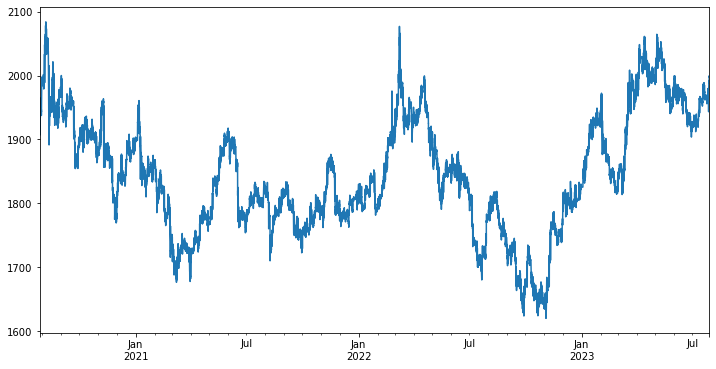

In [16]:
ts.plot(figsize=(12,6))

count     26303.0
unique     4012.0
top        1807.7
freq         70.0
dtype: float64

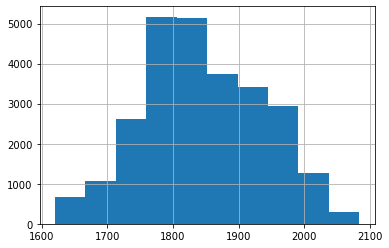

In [17]:
itog = ts.describe()
mtog = ts.mean()
stog = ts.std()
ts.hist()
itog

In [18]:
mtog, stog

(1845.4356309166337, 91.14019587862701)

In [19]:
print('V = %f' % (stog/mtog))

V = 0.049387


In [20]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(ts)
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
print(itog)

        JB               p-value                 skew             kurtosis     
-------------------------------------------------------------------------------
381.3430417454356 1.5574375051778725e-83 0.08068750621720956 2.4326270494127864
-------------------------------------------------------------------------------


In [21]:
test = sm.tsa.adfuller(ts)
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -2.419497028386224
p-value:  0.13630895968197598
Critical values:  {'1%': -3.4305991120827652, '5%': -2.861650100229875, '10%': -2.5668286030928766}
есть единичные корни, ряд не стационарен


<AxesSubplot:>

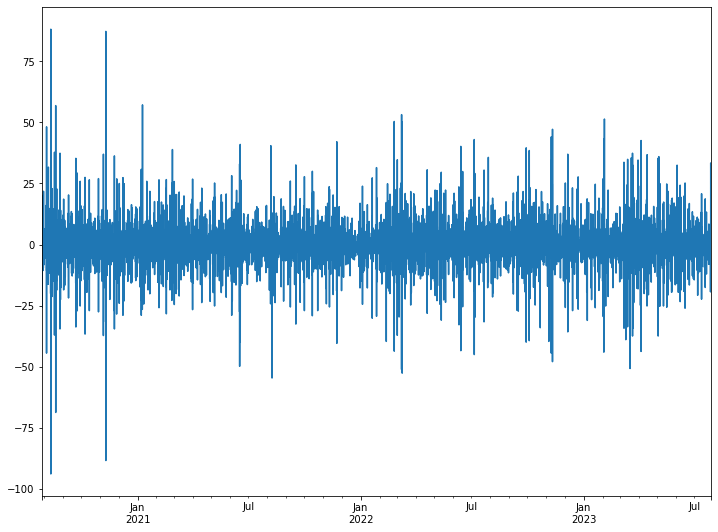

In [22]:
ts1diff = ts.diff(periods=1).dropna()
ts1diff.plot(figsize=(12,9))

In [23]:
test = sm.tsa.adfuller(ts1diff)
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -23.874193827555946
p-value:  0.0
Critical values:  {'1%': -3.4305991215729548, '5%': -2.861650104424084, '10%': -2.5668286053253606}
единичных корней нет, ряд стационарен


In [24]:
m = ts1diff.index[int(len(ts1diff.index)/2+1)]
r1 = sm.stats.DescrStatsW(ts1diff[m:])
r2 = sm.stats.DescrStatsW(ts1diff[:m])
print ('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  0.7327899709994565


Ряд с высокой долей вероятности интегрированный 1 порядка

# ARIMA

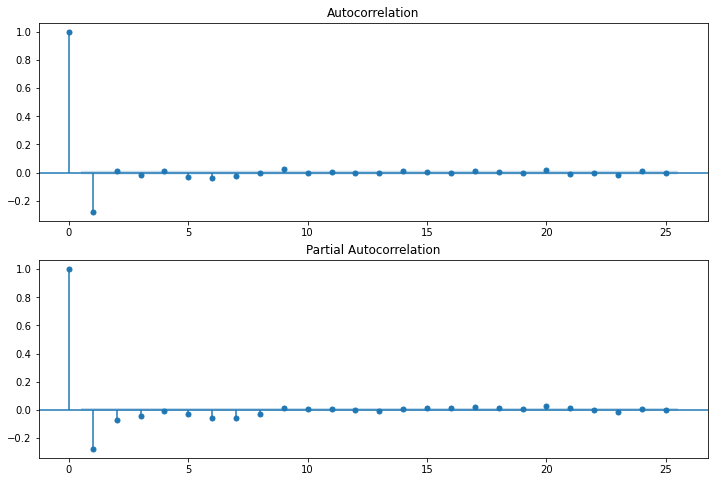

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1diff, lags=25, ax=ax2)

In [26]:
src_data_model = ts[:'2023-01-01 00:00:00']
np.asarray(src_data_model)


array([1937.1, 1943.3, 1959.1, ..., 1825.2, 1825.4, 1825.5], dtype=object)

In [27]:
model = sm.tsa.ARIMA(src_data_model.astype(float), order=(8,1,1)).fit(full_output=False, disp=0)

D:\Programs\Anac\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Programs\Anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  war

In [28]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                21286
Model:                 ARIMA(8, 1, 1)   Log Likelihood              -62633.023
Method:                       css-mle   S.D. of innovations              4.588
Date:                Thu, 10 Aug 2023   AIC                         125288.046
Time:                        14:13:36   BIC                         125375.670
Sample:                    07-28-2020   HQIC                        125316.628
                         - 01-01-2023                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054      0.018     -0.294      0.769      -0.042       0.031
ar.L1.D.y     -0.7857      0.151     -5.220      0.000      -1.081      -0.491
ar.L2.D.y     -0.2438      0.048     -5.077      0.0

In [29]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True) #свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам
print(DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

       Q-stat   p-value
0    0.001220  0.972142
1    0.017211  0.991431
2    0.055950  0.996539
3    0.101278  0.998760
4    0.107542  0.999806
5    0.112136  0.999972
6    0.219659  0.999965
7    1.204360  0.996599
8    4.672582  0.861866
9    7.472324  0.680228
10   7.619997  0.746885
11   7.829073  0.798341
12   7.884297  0.851055
13  17.094020  0.251202
14  22.181214  0.103140
15  24.305558  0.083040
16  28.144196  0.043281
17  30.278793  0.034823
18  30.335388  0.047682
19  41.303628  0.003405
20  41.323836  0.005112
21  43.452683  0.004149
22  49.535053  0.001060
23  49.563979  0.001608
24  50.908692  0.001644
25  61.406948  0.000108
26  61.815297  0.000152
27  64.309381  0.000111
28  69.014362  0.000041
29  69.704722  0.000053
30  70.171621  0.000073
31  73.619919  0.000040
32  74.573139  0.000047
33  74.728023  0.000069
34  75.212463  0.000092
35  75.790004  0.000118
36  77.292710  0.000115
37  77.545825  0.000160
38  78.738871  0.000170
39  79.692863  0.000192


D:\Programs\Anac\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\Programs\Anac\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [30]:
pred = model.predict('2023-01-01 00:00:00','2023-07-29 00:00:00', typ='levels')
trn = ts['2023-01-01 00:00:00':]
r2 = r2_score(trn, pred)
print ('R^2: %1.2f' % r2)

R^2: -4.85


D:\Programs\Anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [31]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(trn,pred, squared=False)

146.30022144197673

In [32]:
metrics.mean_absolute_error(trn,pred)

131.1477595538468

<AxesSubplot:>

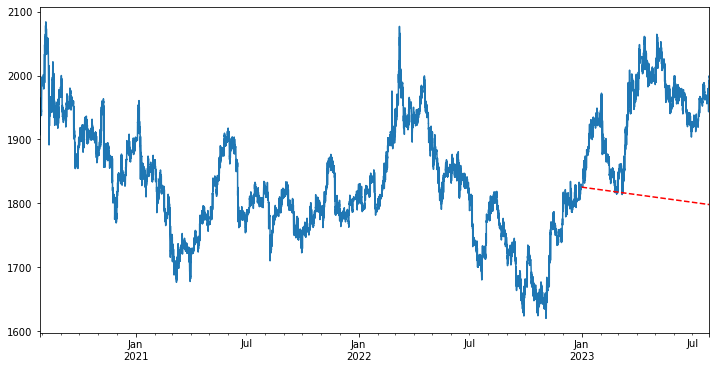

In [33]:
ts.plot(figsize=(12,6))
pred.plot(style='r--')

In [34]:
tslog = pd.Series(np.log(ts.to_list()), index=ts.index)
tslog

2020-07-28 02:00:00    7.568947
2020-07-28 03:00:00    7.572143
2020-07-28 04:00:00    7.580240
2020-07-28 05:00:00    7.579730
2020-07-28 06:00:00    7.583400
                         ...   
2023-07-28 20:00:00    7.600552
2023-07-28 21:00:00    7.600702
2023-07-28 22:00:00    7.600052
2023-07-28 23:00:00    7.599702
2023-07-29 00:00:00    7.599752
Length: 26303, dtype: float64

<AxesSubplot:>

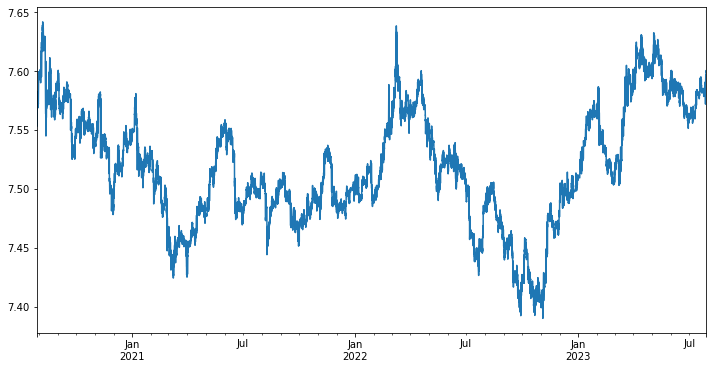

In [35]:
tslog.plot(figsize=(12,6))

<AxesSubplot:>

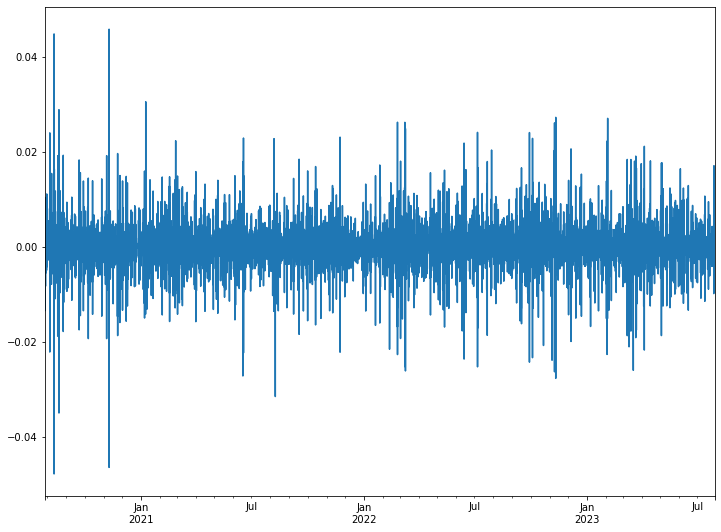

In [36]:
tslogdiff = tslog.diff(periods=1).dropna()
tslogdiff.plot(figsize=(12,9))

In [37]:
test1 = sm.tsa.adfuller(tslogdiff)
print ('adf: ', test1[0]) 
print ('p-value: ', test1[1])
print('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -23.861701102678982
p-value:  0.0
Critical values:  {'1%': -3.4305991215729548, '5%': -2.861650104424084, '10%': -2.5668286053253606}
единичных корней нет, ряд стационарен


In [38]:
m = tslogdiff.index[int(len(tslogdiff.index)/2+1)]
r1 = sm.stats.DescrStatsW(tslogdiff[m:])
r2 = sm.stats.DescrStatsW(tslogdiff[:m])
print ('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  0.7385516809427197


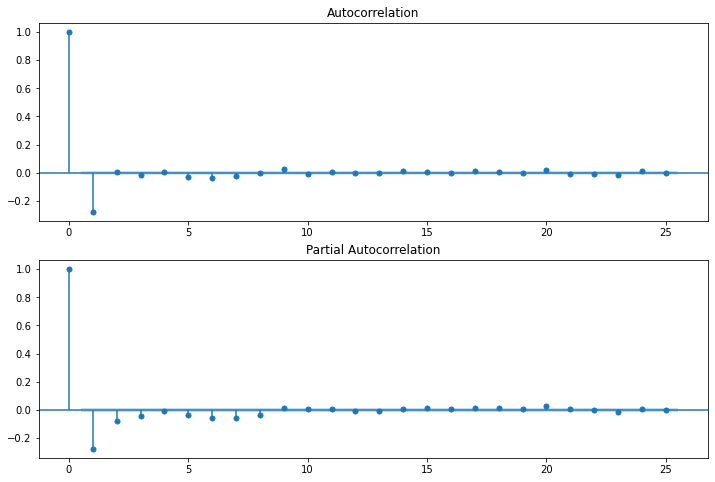

In [39]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tslogdiff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tslogdiff, lags=25, ax=ax2)

In [40]:
src_data_model1 = tslog[:'2023-01-01 00:00:00']
np.asarray(src_data_model1)

array([7.56894729, 7.57214284, 7.58024046, ..., 7.50944485, 7.50955442,
       7.5096092 ])

In [41]:
model1 = sm.tsa.ARIMA(src_data_model1.astype(float), order=(2,1,1)).fit(full_output=False, disp=0)

D:\Programs\Anac\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Programs\Anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  war

In [42]:
print(model1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                21286
Model:                 ARIMA(2, 1, 1)   Log Likelihood               97308.709
Method:                       css-mle   S.D. of innovations              0.003
Date:                Thu, 10 Aug 2023   AIC                        -194607.419
Time:                        14:13:46   BIC                        -194567.590
Sample:                    07-28-2020   HQIC                       -194594.427
                         - 01-01-2023                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.895e-06   1.05e-05     -0.276      0.782   -2.34e-05    1.76e-05
ar.L1.D.y      0.3922      0.035     11.304      0.000       0.324       0.460
ar.L2.D.y      0.1217      0.014      8.770      0.0

In [43]:
q_test = sm.tsa.stattools.acf(model1.resid, qstat=True) #свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам
print(DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

        Q-stat       p-value
0     0.000196  9.888430e-01
1     0.003698  9.981527e-01
2     2.957423  3.982364e-01
3    11.456596  2.188452e-02
4    39.346093  2.022788e-07
5    74.556914  4.735295e-14
6    89.220691  1.788337e-16
7    90.013904  4.620323e-16
8   113.197268  3.280245e-20
9   113.728898  9.425739e-20
10  117.047690  7.106595e-20
11  117.047741  2.393025e-19
12  117.694387  5.742078e-19
13  124.922733  6.804297e-20
14  128.856168  3.560171e-20
15  130.311110  5.585042e-20
16  135.106044  1.938549e-20
17  138.108033  1.481798e-20
18  138.244652  3.951083e-20
19  148.222305  1.375505e-21
20  148.227586  3.811648e-21
21  151.591398  2.396111e-21
22  159.343439  2.226556e-22
23  159.707177  5.099220e-22
24  160.760869  8.516536e-22
25  170.894821  2.854287e-23
26  171.729146  5.204534e-23
27  175.209794  3.027216e-23
28  179.730585  1.126536e-23
29  180.283811  2.252788e-23
30  180.530248  5.052970e-23
31  183.364636  3.777254e-23
32  184.072848  6.827720e-23
33  184.611644

D:\Programs\Anac\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\Programs\Anac\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [44]:
pred1 = model1.predict('2023-01-01 00:00:00','2023-07-29 00:00:00', typ='levels')
trn1 = tslog['2023-01-01 00:00:00':]
r2 = r2_score(trn1, pred1)
print ('R^2: %1.2f' % r2)

R^2: -5.02


D:\Programs\Anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:>

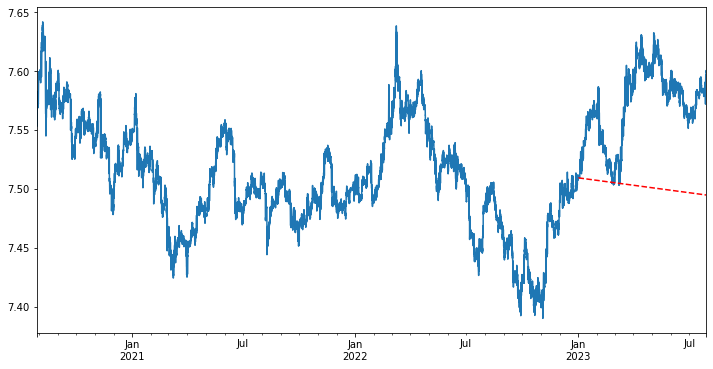

In [45]:
tslog.plot(figsize=(12,6))
pred1.plot(style='r--')

<AxesSubplot:>

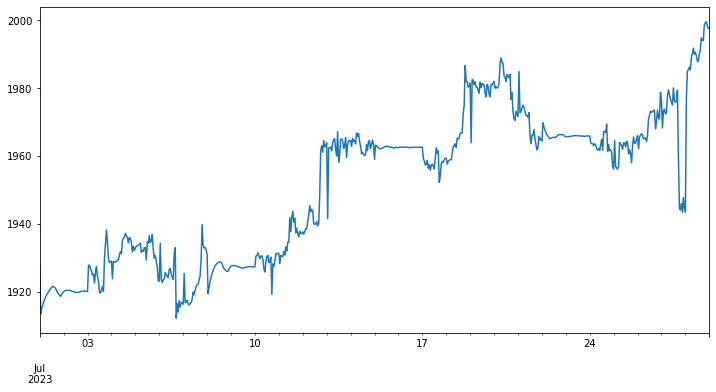

In [46]:
tsday = ts['2023-07-01 00:00:00':]
tsday.plot(figsize=(12,6))

<AxesSubplot:xlabel='<DATE>'>

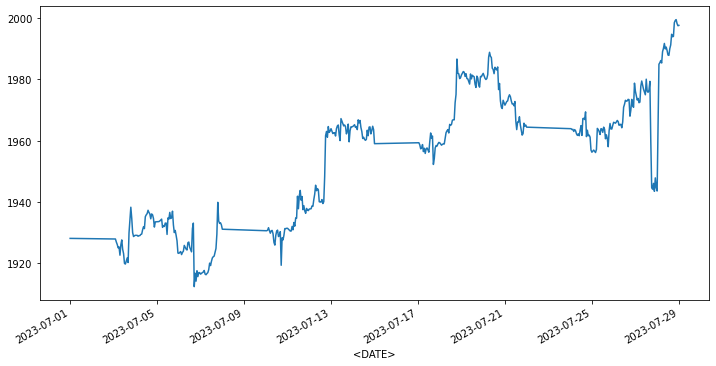

In [47]:
tsdayold = tsold['2023-07-01 00:00:00':]
tsdayold.plot(figsize=(12,6))

<AxesSubplot:xlabel='<DATE>'>

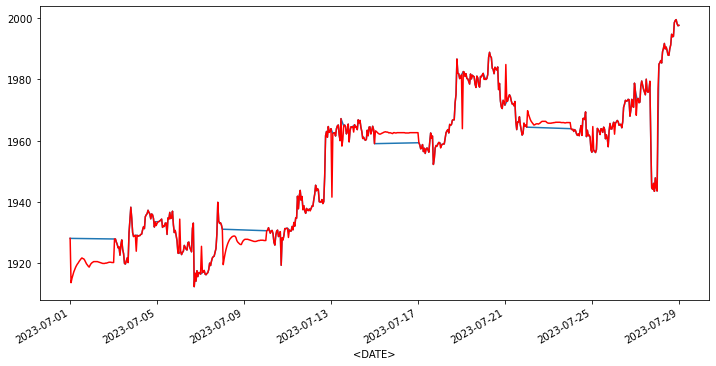

In [48]:
tsdayold.plot(figsize=(12,6))
tsday.plot(figsize=(12,6),color='red')

<AxesSubplot:>

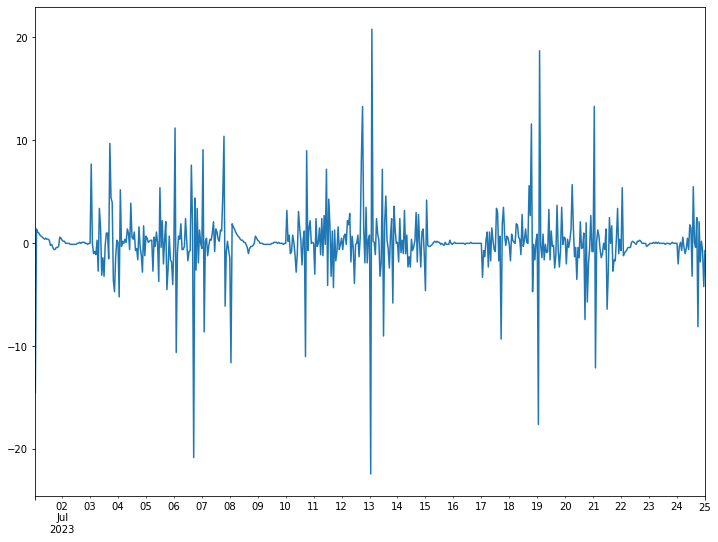

In [50]:
tsdaym = tsday[:'2023-07-25 00:00:00']
tsdaydiff = tsdaym.diff(periods=1).dropna()
tsdaydiff.plot(figsize=(12,9))

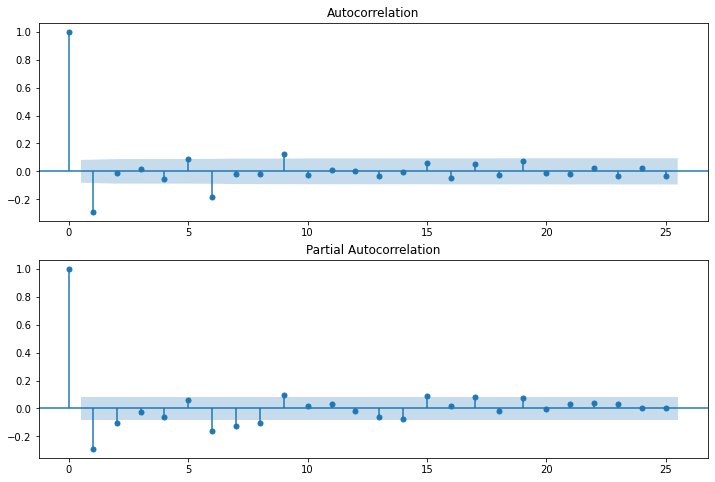

In [52]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsdaydiff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsdaydiff, lags=25, ax=ax2)

In [57]:

model2 = sm.tsa.ARIMA(tsdaym.astype(float), order=(8,1,6)).fit(full_output=False)

D:\Programs\Anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
D:\Programs\Anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
modelday = tsdaym.predict('2023-07-25 00:00:00','2023-07-29 00:00:00', typ='levels')